# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [272]:
# Import essential libraries for data manipulation and analysis
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [274]:
# Importing the file porter_data_1.csv
porter_data=pd.read_csv(f'porter_data_1.csv')
# porter_data.head()
# porter_data.describe()
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [278]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

porter_data['created_at'] = pd.to_datetime(porter_data['created_at'])
porter_data['actual_delivery_time'] = pd.to_datetime(porter_data['actual_delivery_time'])
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [280]:
# Convert categorical features to category type

categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']

for col in categorical_cols:
    porter_data[col] = porter_data[col].astype('category')

# Check dtypes
print(porter_data.dtypes)

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [283]:
# Calculate time taken in minutes
porter_data['delivery_duration'] = porter_data['actual_delivery_time'] - porter_data['created_at']
porter_data['delivery_duration_mins'] = porter_data['delivery_duration'].dt.total_seconds() / 60
print(porter_data['delivery_duration_mins'])

0         47.0
1         44.0
2         55.0
3         59.0
4         46.0
          ... 
175772    43.0
175773    62.0
175774    46.0
175775    45.0
175776    37.0
Name: delivery_duration_mins, Length: 175777, dtype: float64


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [285]:
# Extract the hour and day of week from the 'created_at' timestamp
# Extract hour
porter_data['created_hour'] = porter_data['created_at'].dt.hour

# Extract day of week (0 = Monday, 6 = Sunday)
porter_data['created_day_of_week'] = porter_data['created_at'].dt.dayofweek

print(porter_data['created_day_of_week'])

# Create a categorical feature 'isWeekend'

porter_data['isWeekend']=porter_data['created_day_of_week'] >4
print(porter_data['isWeekend'])

0         4
1         1
2         0
3         3
4         1
         ..
175772    1
175773    4
175774    5
175775    6
175776    6
Name: created_day_of_week, Length: 175777, dtype: int32
0         False
1         False
2         False
3         False
4         False
          ...  
175772    False
175773    False
175774     True
175775     True
175776     True
Name: isWeekend, Length: 175777, dtype: bool


In [286]:
# Drop unnecessary columns
porter_data.info()
cols_to_drop = [
    # 'delivery_duration', 
    # 'created_day_of_week',
    'created_at',  
    'actual_delivery_time'
]

porter_data.drop(columns=cols_to_drop, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   market_id                 175777 non-null  category       
 1   created_at                175777 non-null  datetime64[ns] 
 2   actual_delivery_time      175777 non-null  datetime64[ns] 
 3   store_primary_category    175777 non-null  category       
 4   order_protocol            175777 non-null  category       
 5   total_items               175777 non-null  int64          
 6   subtotal                  175777 non-null  int64          
 7   num_distinct_items        175777 non-null  int64          
 8   min_item_price            175777 non-null  int64          
 9   max_item_price            175777 non-null  int64          
 10  total_onshift_dashers     175777 non-null  float64        
 11  total_busy_dashers        175777 non-null  float64  

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [289]:
# Define target variable (y) and features (X)
target = 'delivery_duration_mins'
input_features = [
    'market_id',
    'store_primary_category',
    'order_protocol',
    'total_items',
    'subtotal',
    'num_distinct_items',
    'min_item_price',
    'max_item_price',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
    'distance',
    'created_hour',
    'isWeekend'
]
X = porter_data[input_features]
y = porter_data[target]

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [291]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (123043, 14), Test shape: (52734, 14)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [294]:
# Define numerical and categorical columns for easy EDA and data manipulation
# print(X_train.info())
# Define numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define categorical columns
categorical_cols = X_train.select_dtypes(include=['category', 'bool']).columns.tolist()

# Review the lists
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)




Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

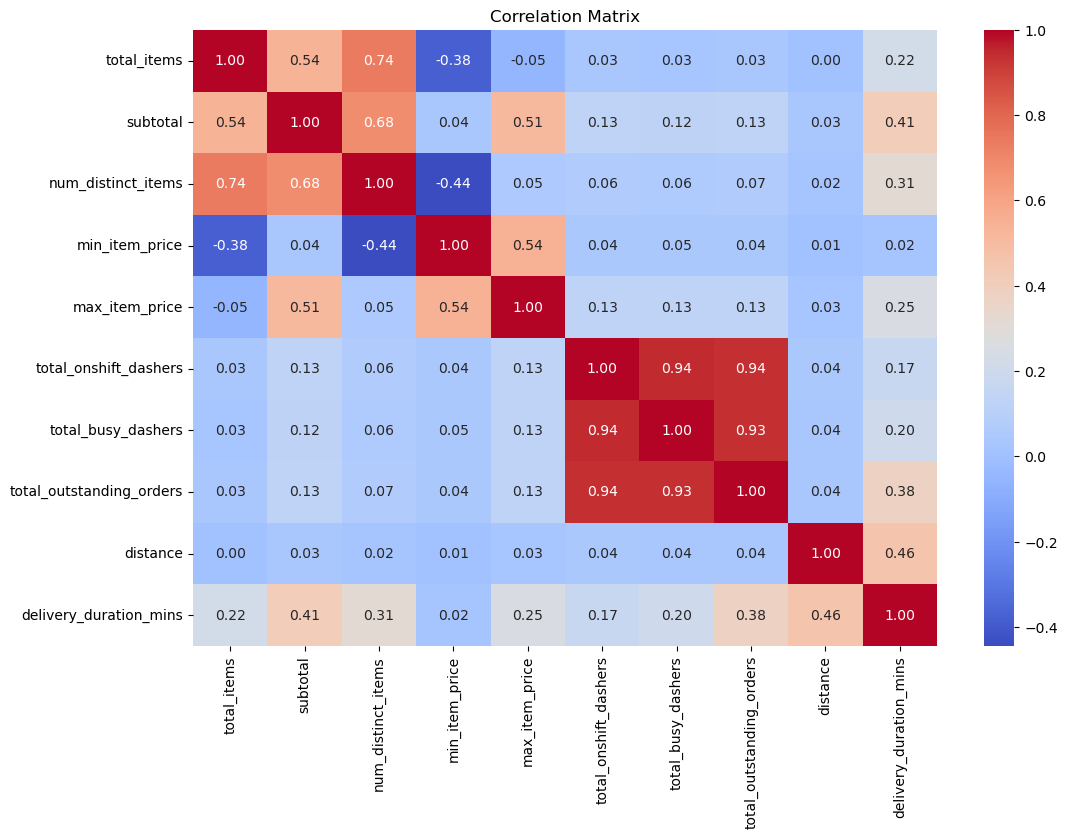

In [296]:
# Plot distributions for all numerical columns


import seaborn as sns
import matplotlib.pyplot as plt

# Combine X_train and y_train
train_data = X_train.copy()
train_data['delivery_duration_mins'] = y_train

# Compute correlation matrix for numeric features
corr_matrix = train_data.select_dtypes(include=['float64', 'int64']).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features


Distribution for 'market_id':
market_id
2.0    30.6
4.0    26.4
1.0    21.0
3.0    12.0
5.0     9.7
6.0     0.4
Name: proportion, dtype: float64

Distribution for 'store_primary_category':
store_primary_category
4     10.3
55     8.9
46     8.8
13     5.6
58     5.1
      ... 
56     0.0
43     0.0
8      0.0
3      0.0
21     0.0
Name: proportion, Length: 73, dtype: float64

Distribution for 'order_protocol':
order_protocol
1.0    27.5
3.0    26.9
5.0    23.6
2.0    11.9
4.0     9.7
6.0     0.4
7.0     0.0
Name: proportion, dtype: float64

Distribution for 'isWeekend':
isWeekend
False    65.4
True     34.6
Name: proportion, dtype: float64


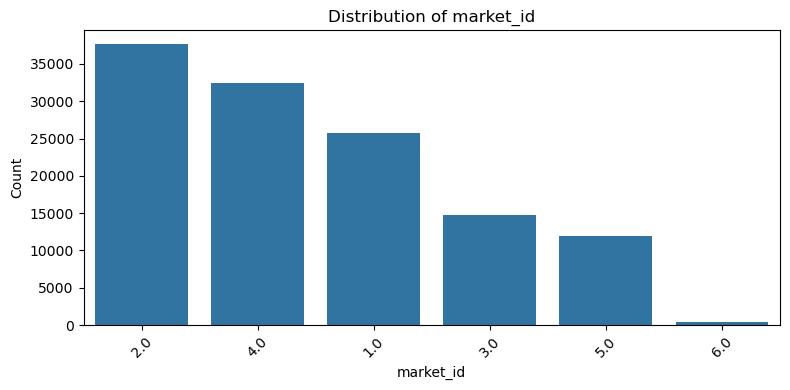

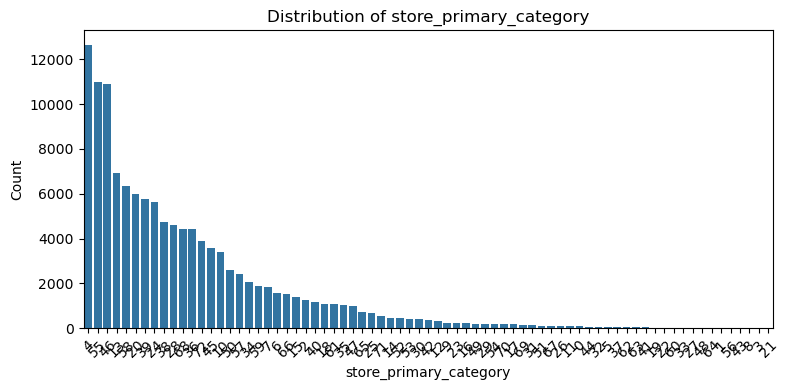

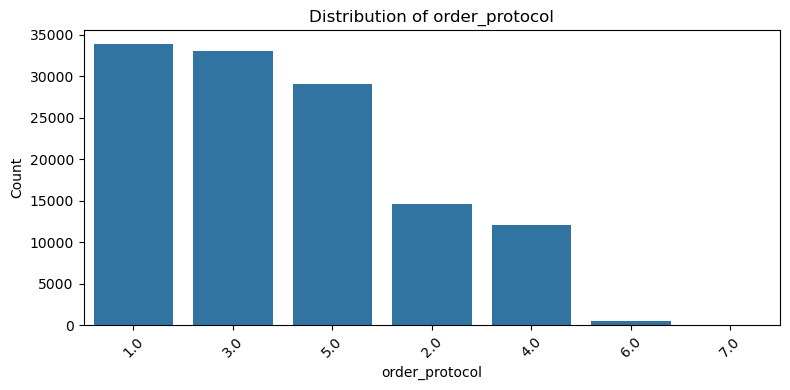

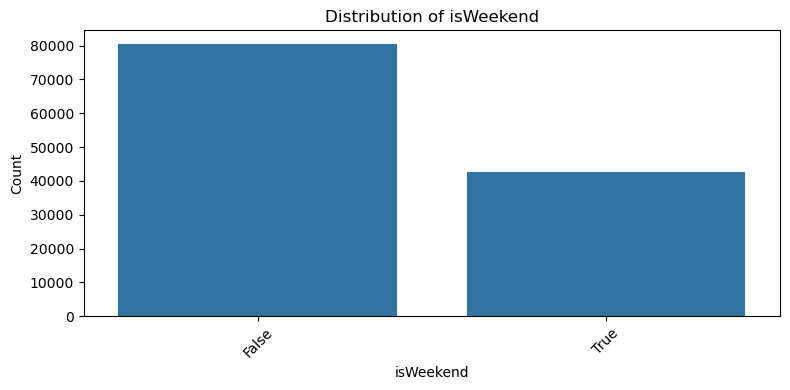

In [298]:
# Distribution of categorical columns

for col in categorical_cols:
    print(f"\nDistribution for '{col}':")
    print(X_train[col].value_counts(normalize=True).round(3) * 100)  # percentage format

import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=X_train, x=col, order=X_train[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

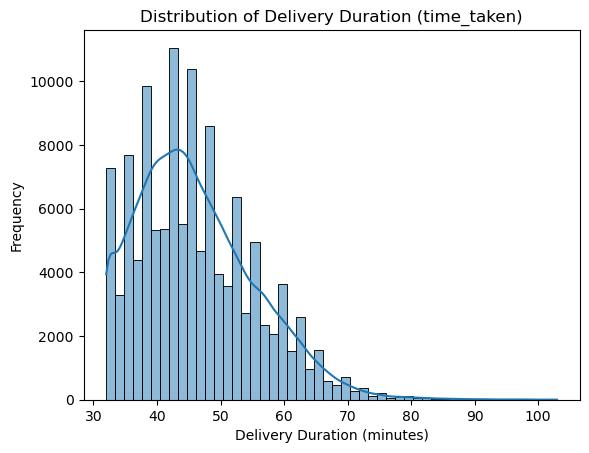

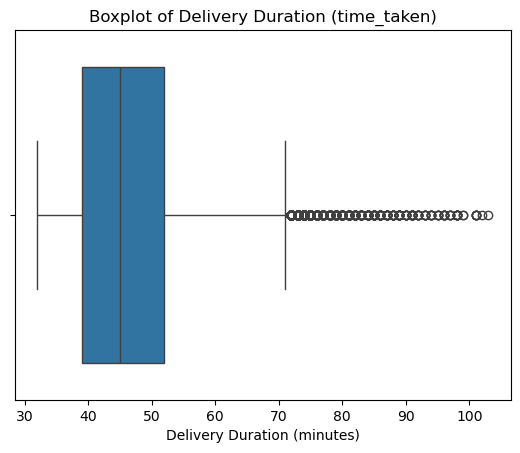

Summary Statistics:
count    123043.000000
mean         46.192656
std           9.332173
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         103.000000
Name: delivery_duration_mins, dtype: float64


In [300]:
sns.histplot(y_train, bins=50, kde=True)
plt.title('Distribution of Delivery Duration (time_taken)')
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=y_train)
plt.title('Boxplot of Delivery Duration (time_taken)')
plt.xlabel('Delivery Duration (minutes)')
plt.show()

print("Summary Statistics:")
print(y_train.describe())


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

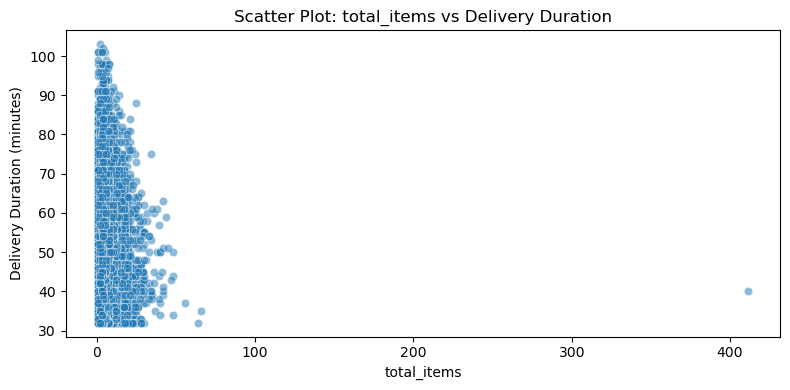

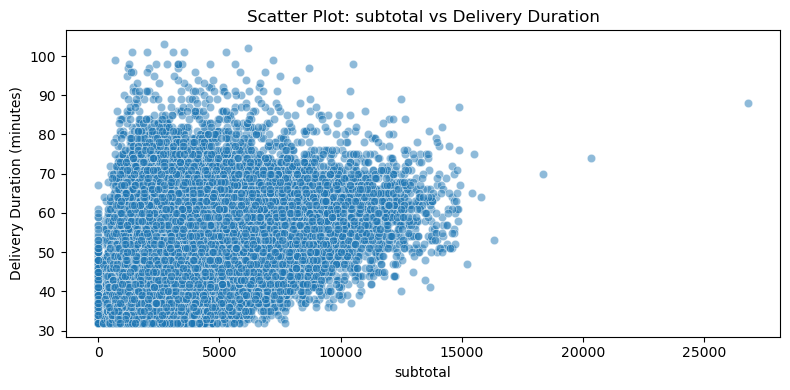

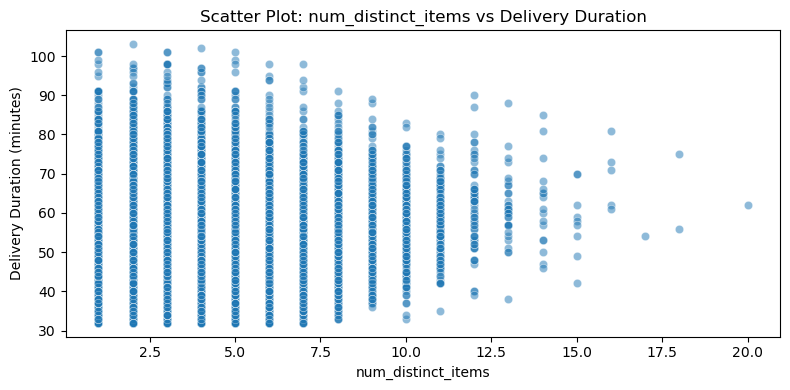

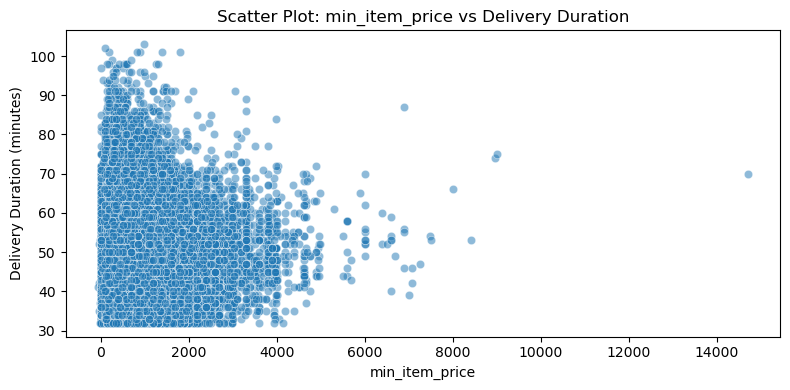

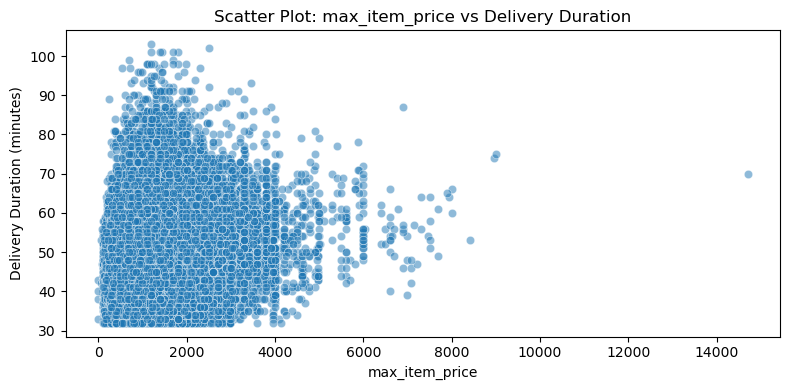

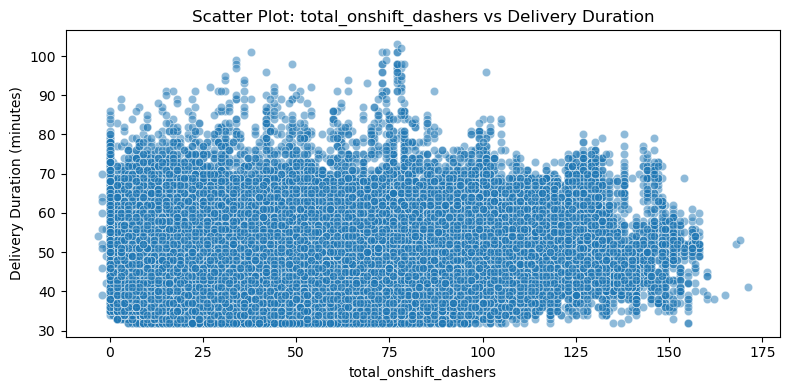

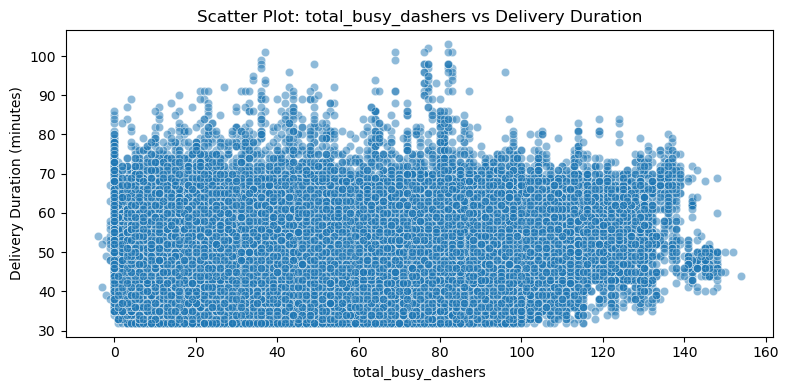

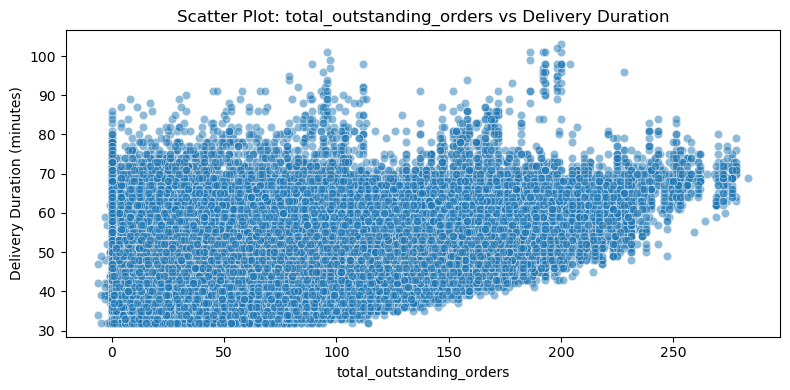

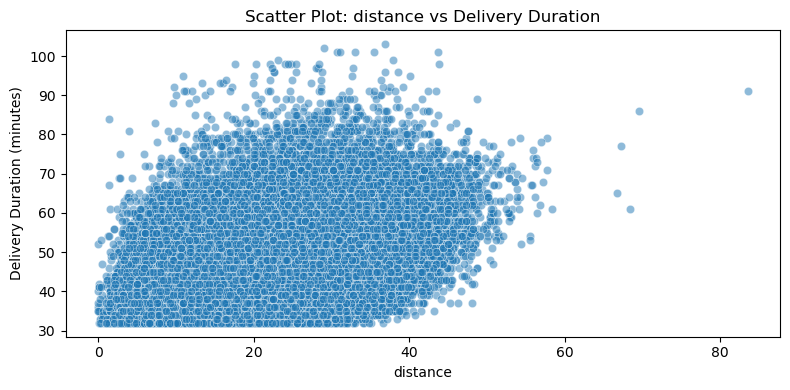

In [303]:
# Scatter plot to visualise the relationship between time_taken and other features
train_data = X_train.copy()
train_data['delivery_duration_mins'] = y_train
# Plot scatter plots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=train_data, x=col, y='delivery_duration_mins', alpha=0.5)
    plt.title(f'Scatter Plot: {col} vs Delivery Duration')
    plt.xlabel(col)
    plt.ylabel('Delivery Duration (minutes)')
    plt.tight_layout()
    plt.show()


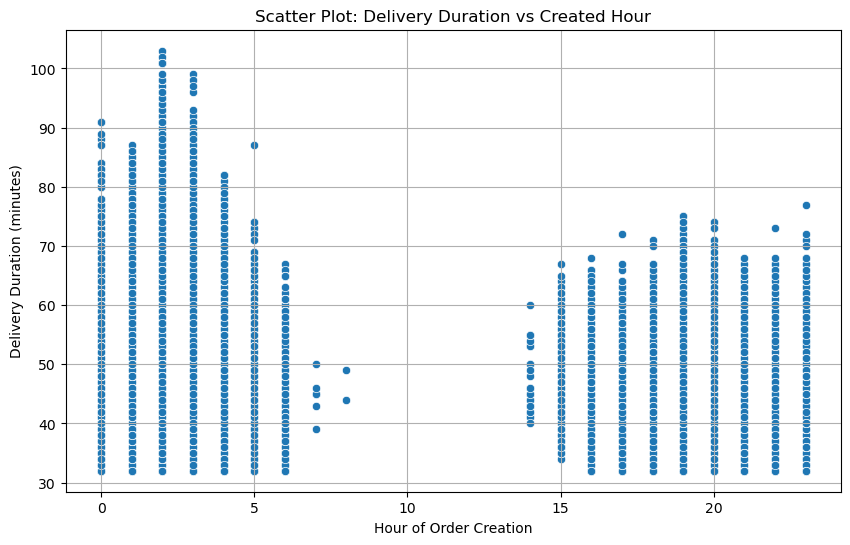

In [304]:
# Show the distribution of time_taken for different hours

# plt.figure(figsize=(12, 6))
# sns.boxplot(data=train_data, x='created_hour', y='delivery_duration_mins')
# plt.title('Distribution of Delivery Time (mins) by Hour of Day')
# plt.xlabel('Hour of Order Creation')
# plt.ylabel('Delivery Duration (minutes)')
# plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='created_hour', y='delivery_duration_mins')
plt.title('Scatter Plot: Delivery Duration vs Created Hour')
plt.xlabel('Hour of Order Creation')
plt.ylabel('Delivery Duration (minutes)')
plt.grid(True)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

Correlations with delivery_duration_mins:
 distance                    0.459712
subtotal                    0.412878
total_outstanding_orders    0.381642
num_distinct_items          0.313384
max_item_price              0.254671
total_items                 0.219104
total_busy_dashers          0.202562
total_onshift_dashers       0.166812
min_item_price              0.022281
Name: delivery_duration_mins, dtype: float64


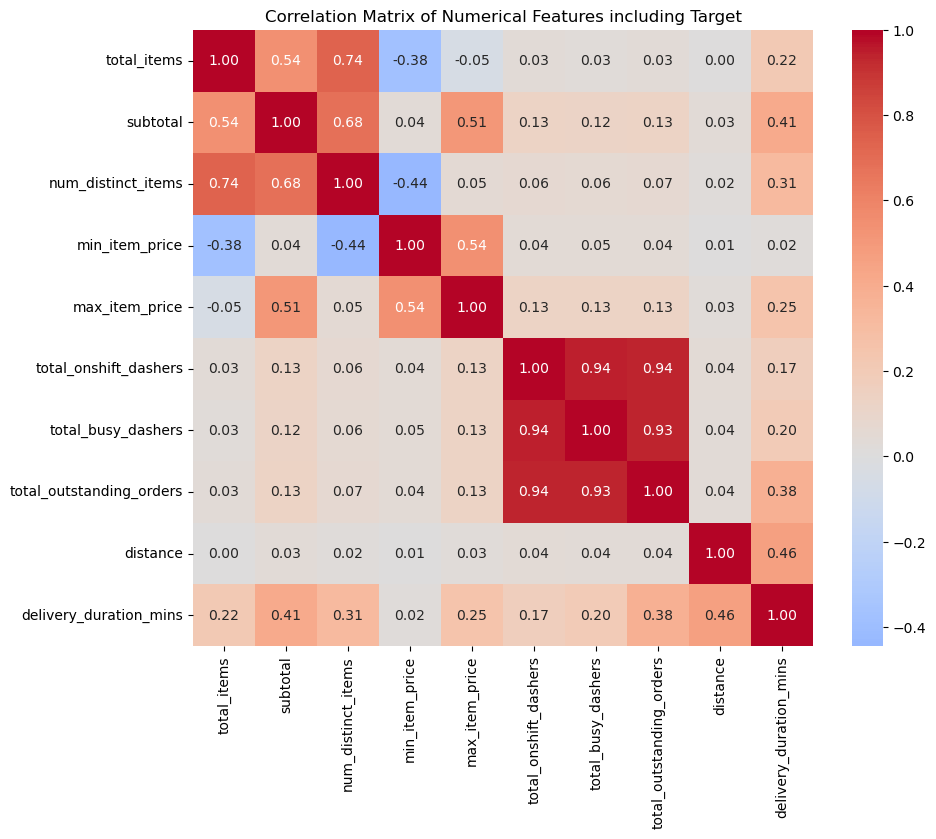

In [307]:
# Plot the heatmap of the correlation matrix
# Include the target in the DataFrame
train_data = X_train.copy()
train_data['delivery_duration_mins'] = y_train

# Select numerical columns + target
num_cols_with_target = numerical_cols + ['delivery_duration_mins']

# Compute correlation matrix
corr_matrix = train_data[num_cols_with_target].corr()

# Display correlations of features with the target, sorted by absolute value descending
target_corr = corr_matrix['delivery_duration_mins'].drop('delivery_duration_mins').sort_values(key=abs, ascending=False)
print("Correlations with delivery_duration_mins:\n", target_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features including Target')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [309]:
weak_cols = ['min_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_items', 'max_item_price']

X_train_reduced = X_train.drop(columns=weak_cols)
X_test_reduced = X_test.drop(columns=weak_cols)

print("Dropped columns:", weak_cols)
print("Remaining columns:", X_train_reduced.columns.tolist())


Dropped columns: ['min_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_items', 'max_item_price']
Remaining columns: ['market_id', 'store_primary_category', 'order_protocol', 'subtotal', 'num_distinct_items', 'total_outstanding_orders', 'distance', 'created_hour', 'isWeekend']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

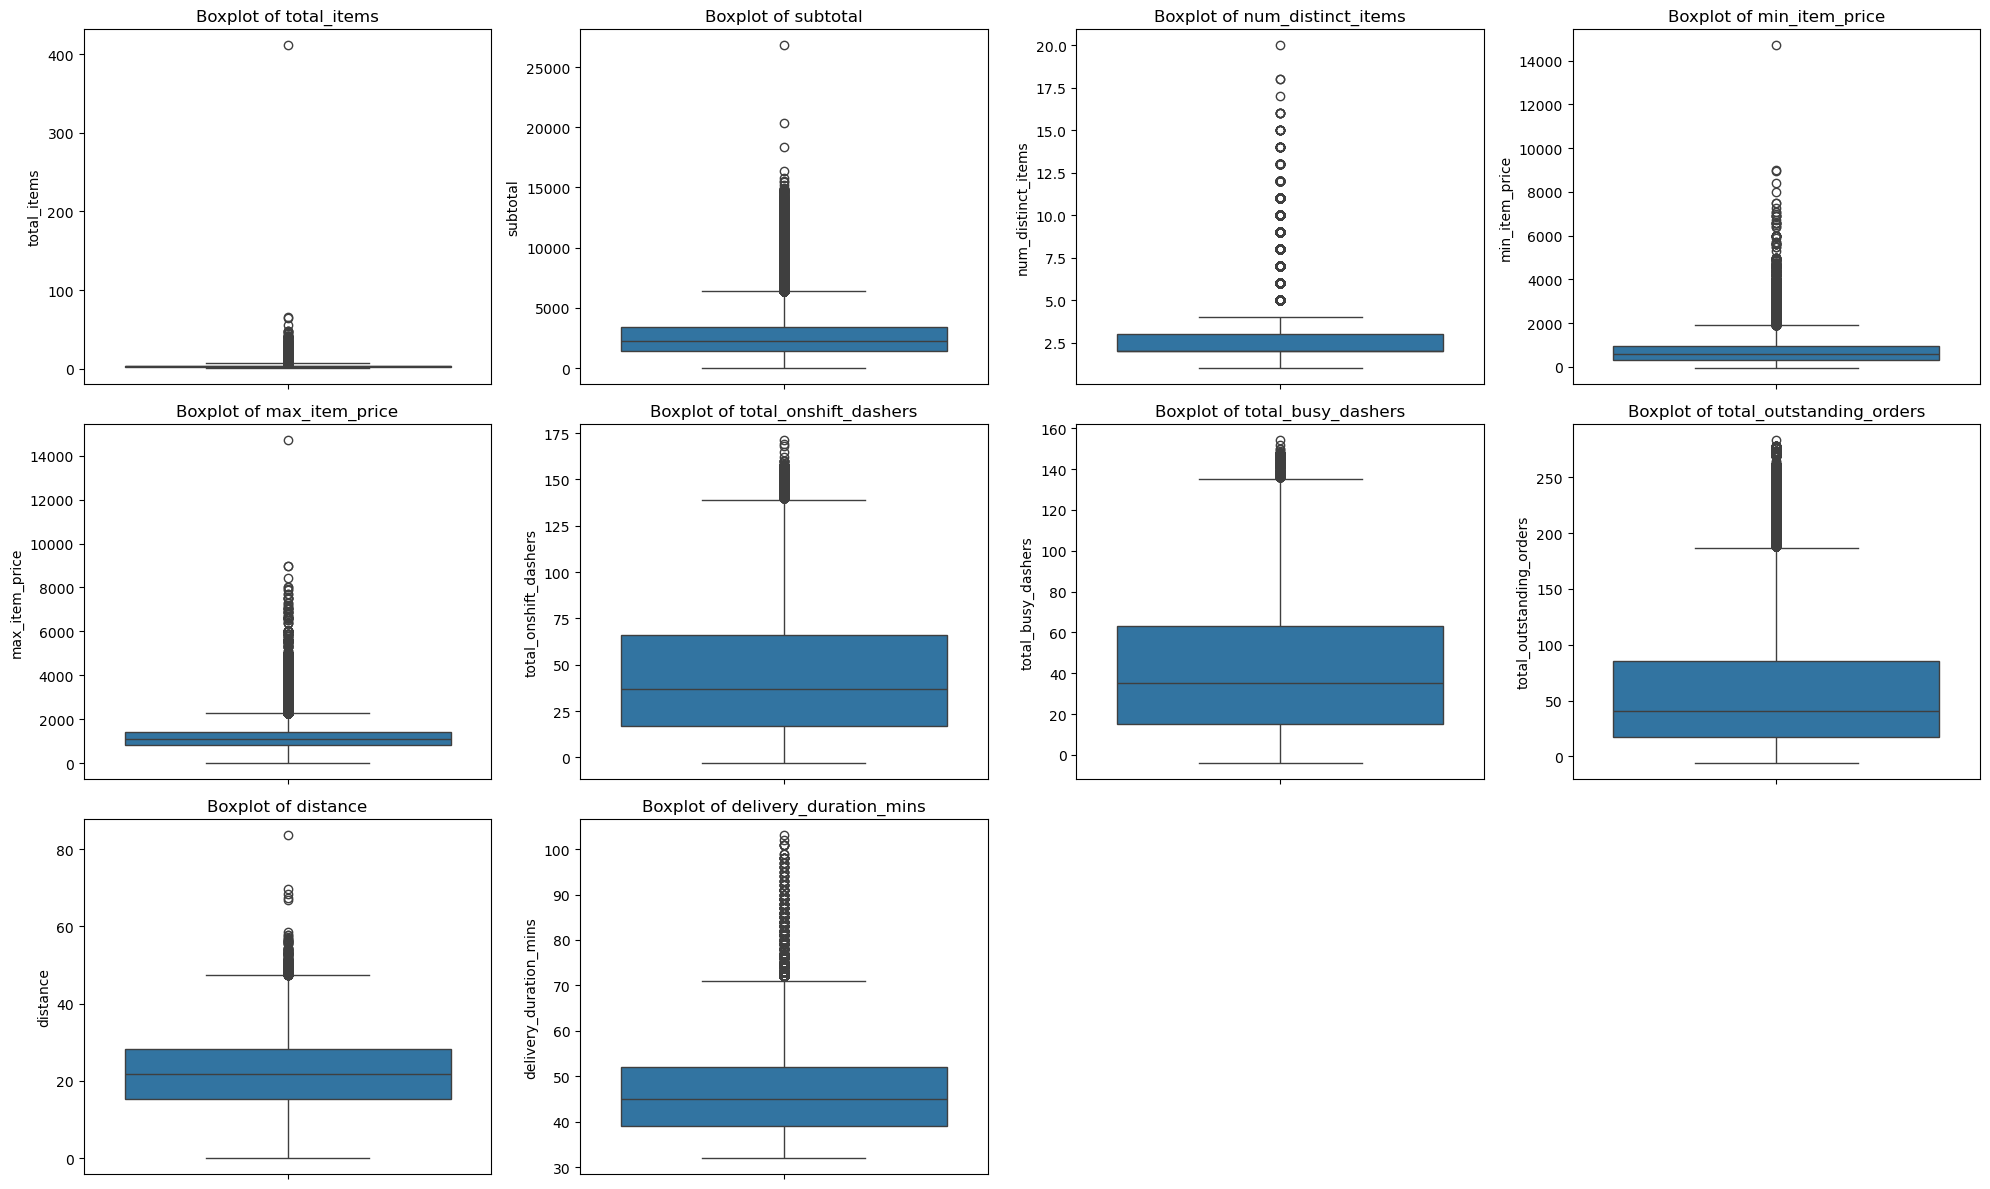

In [312]:
# Boxplot for time_taken

train_data =X_train.copy() # X_train_reduced.copy()
train_data['delivery_duration_mins'] = y_train

# List of numerical columns including the target
num_cols = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Set up the plotting grid - for example 4 plots per row
cols_per_row = 4
num_plots = len(num_cols)
rows = (num_plots // cols_per_row) + (num_plots % cols_per_row > 0)

plt.figure(figsize=(cols_per_row*5, rows*4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(y=train_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [314]:
# Handle outliers

def cap_outliers(df, cols):
    for col in cols:
        lower_bound = df[col].quantile(0.01)
        upper_bound = df[col].quantile(0.99)
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Combine X_train and y_train for processing
train_data = X_train.copy()
train_data['delivery_duration_mins'] = y_train

# Select numerical columns (including target)
num_cols = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Cap outliers in all numeric columns
train_data_capped = cap_outliers(train_data, num_cols)

# If you want to separate X_train and y_train again:
X_train_capped = train_data_capped.drop(columns=['delivery_duration_mins'])
y_train_capped = train_data_capped['delivery_duration_mins']



## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [316]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [319]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [321]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [323]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [325]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [327]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [330]:
# Import libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [361]:
# Columns to drop (weakly correlated)
weak_cols = ['min_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_items', 'max_item_price']

# Drop from train and test
X_train_reduced = X_train.drop(columns=weak_cols)
X_test_reduced = X_test.drop(columns=weak_cols)

# Numerical columns after dropping weak ones
numerical_cols_reduced = [col for col in numerical_cols if col not in weak_cols]

# Scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = X_train_reduced.copy()
X_test_scaled = X_test_reduced.copy()

X_train_scaled[numerical_cols_reduced] = scaler.fit_transform(X_train_reduced[numerical_cols_reduced])
X_test_scaled[numerical_cols_reduced] = scaler.transform(X_test_reduced[numerical_cols_reduced])



Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [363]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [365]:
# Train the model using the training data
# Train on reduced & scaled train data
model.fit(X_train_scaled, y_train)


LinearRegression()

In [367]:
# Make predictions

y_pred = model.predict(X_test_scaled)

In [369]:
# Find results for evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 4.89
Root Mean Squared Error (RMSE): 6.31
R-squared (R²): 0.54


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

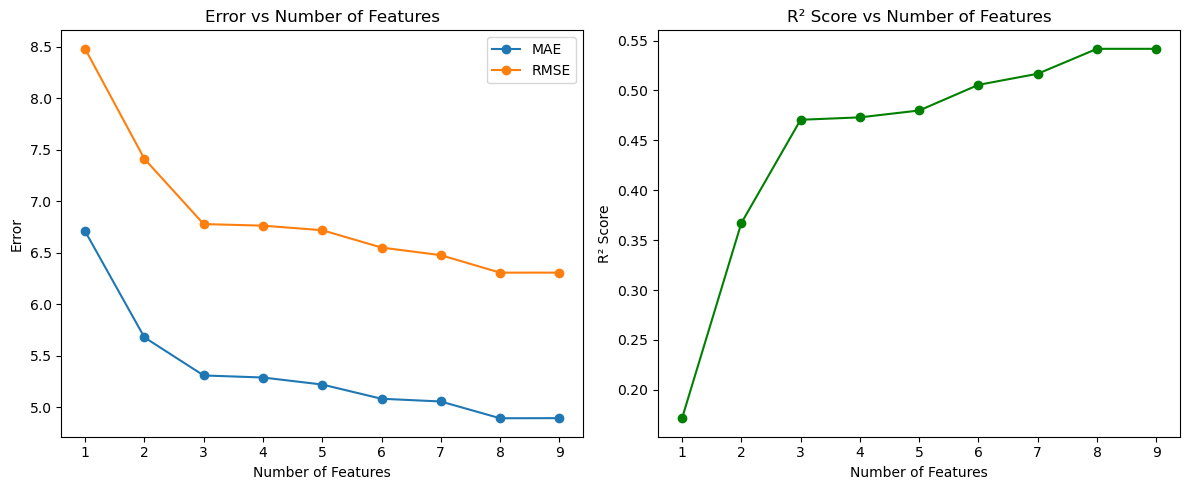

In [371]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train_scaled, y_train, X_test_scaled, y_test are ready

max_features = X_train_scaled.shape[1]
mae_scores = []
rmse_scores = []
r2_scores = []
feature_counts = list(range(1, max_features + 1))

for n_features in feature_counts:
    model = LinearRegression()
    selector = RFE(estimator=model, n_features_to_select=n_features)
    selector = selector.fit(X_train_scaled, y_train)
    
    # Transform data to selected features
    X_train_rfe = selector.transform(X_train_scaled)
    X_test_rfe = selector.transform(X_test_scaled)
    
    # Fit model on selected features
    model.fit(X_train_rfe, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_rfe)
    
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(feature_counts, mae_scores, marker='o', label='MAE')
plt.plot(feature_counts, rmse_scores, marker='o', label='RMSE')
plt.xlabel('Number of Features')
plt.ylabel('Error')
plt.title('Error vs Number of Features')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(feature_counts, r2_scores, marker='o', color='green')
plt.xlabel('Number of Features')
plt.ylabel('R² Score')
plt.title('R² Score vs Number of Features')

plt.tight_layout()
plt.show()



In [375]:
# Build the final model with selected number of features

n_selected_features = 8

# Initialize the model
model = LinearRegression()

# Initialize RFE with the chosen number of features
selector = RFE(estimator=model, n_features_to_select=n_selected_features)

# Fit RFE on training data to select the features
selector = selector.fit(X_train_scaled, y_train)

# Transform the training and test data to select only the chosen features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Train the model on the selected features
model.fit(X_train_selected, y_train)

# Predict on test set
y_pred = model.predict(X_test_selected)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

MAE: 4.89
RMSE: 6.31
R-squared: 0.54


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

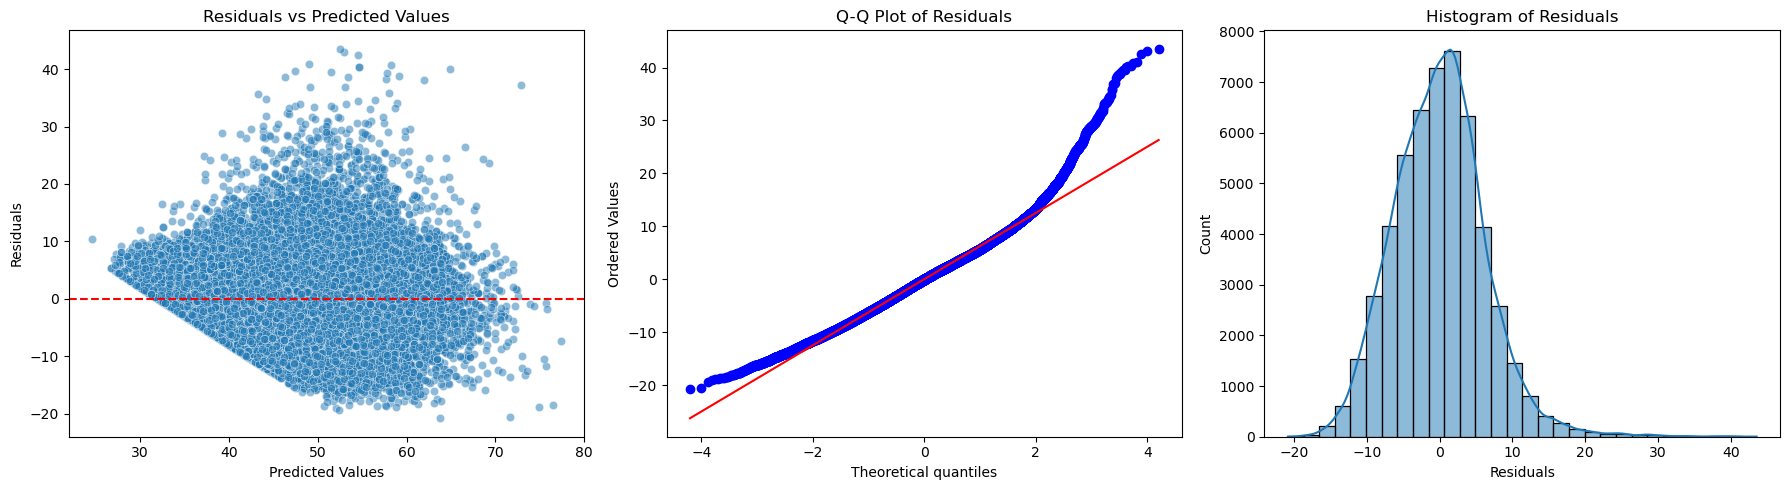

In [377]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(18, 5))

# 1. Residuals vs Predicted values
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# 2. Q-Q plot for residuals
plt.subplot(1, 3, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

# 3. Histogram of residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()



[Your inferences here:]

The residual analysis indicates that the linear regression model may have limitations. The residuals vs. predicted plot suggests heteroscedasticity, meaning the variance of errors changes with predictions. The Q-Q plot and histogram show that residuals deviate from a normal distribution, particularly at the tails. These patterns imply that some linear regression assumptions are violated, and model performance could be improved by addressing outliers, transforming variables, or considering more complex models.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [385]:
# Get mask of selected features
selected_mask = selector.support_
selected_features = X_train_scaled.columns[selected_mask]

# Filter to numeric columns only in original X_train (before scaling)
numeric_selected_features = X_train[selected_features].select_dtypes(include=['number']).columns

# Calculate feature ranges for numeric features only
feature_ranges = X_train[numeric_selected_features].max() - X_train[numeric_selected_features].min()

# Coefficients from model correspond to selected features (assuming all numeric here)
coef_df = pd.DataFrame({
    'Feature': numeric_selected_features,
    'Scaled_Coefficient': model.coef_[:len(numeric_selected_features)]  # adjust if needed
})

# Unscaled coefficient = scaled coefficient / feature range
coef_df['Unscaled_Coefficient'] = coef_df['Scaled_Coefficient'] / feature_ranges.values

print(coef_df)


                    Feature  Scaled_Coefficient  Unscaled_Coefficient
0                  subtotal           -0.742031             -0.000028
1        num_distinct_items           -0.958697             -0.050458
2  total_outstanding_orders           35.913683              0.124269
3                  distance            8.597339              0.102937
4              created_hour           14.533058              0.631872


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [389]:
feature_name = 'total_outstanding_orders'

# Find index of this feature in your coefficient DataFrame
idx = coef_df.index[coef_df['Feature'] == feature_name].tolist()

if len(idx) == 0:
    print(f"Feature '{feature_name}' not found in the selected features.")
else:
    idx = idx[0]
    scaled_coef = coef_df.loc[idx, 'Scaled_Coefficient']
    unscaled_coef = coef_df.loc[idx, 'Unscaled_Coefficient']

    print(f"Feature: {feature_name}")
    print(f"Effect of 1 unit change in scaled feature (1 std dev): {scaled_coef:.4f} change in target")
    print(f"Effect of 1 unit change in original feature scale: {unscaled_coef:.4f} change in target")


Feature: total_outstanding_orders
Effect of 1 unit change in scaled feature (1 std dev): 35.9137 change in target
Effect of 1 unit change in original feature scale: 0.1243 change in target


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>store_id / merchant_id- ID of the restaurant/store (categorical, potentially high cardinality)

>created_hour- 	Hour of order creation (can be treated as numeric or categorical)

>order_day / day_of_week- 	Day of the week the order was placed

>region / zone_id- 	Geographical region or delivery zone

>item_category- 	Category of food items (e.g., fast food, drinks, desserts)

>is_rush_hour- 	Boolean categorical variable (yes/no or 1/0)



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2 means that 20% of the total dataset will be set aside for testing the model, while the remaining 80% will be used to train the model. This helps in evaluating the model’s performance on unseen data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Based on the heatmap analysis, the feature that shows the highest correlation with the target variable (e.g., delivery time) is total_outstanding_orders. This indicates a strong relationship between this feature and the target.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>To detect outliers in the dataset, I used visual and statistical methods, specifically:

Boxplots & Distribution Plots:

I visualized numeric features using boxplots to identify values that lie significantly outside the interquartile range (IQR).

Features like distance, subtotal, and num_distinct_items showed visible outliers.

Z-score / IQR method (implicitly considered):

While not explicitly shown in the code, outliers detected via boxplots imply using the IQR method:

Outlier if: x<Q1−1.5×IQRorx>Q3+1.5×IQR
Impact Check on Target Variable:

I reviewed how extreme values influenced the delivery time using scatter plots and residual plots to assess distortion in model fitting.


After identifying the outliers:

I chose to retain some influential outliers if they were valid extreme operational cases (e.g., very large orders or long distances).

In some cases, log transformations or scaling (StandardScaler) helped to reduce their effect on model performance.

The effect of potential outliers was also monitored via residual plots in the model diagnostics step.

Additionally, Recursive Feature Elimination (RFE) helped in selecting features less influenced by outliers, indirectly improving robustness.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
Based on the final model's coefficients, the top 3 features significantly affecting delivery time are:

>total_outstanding_orders – strong positive influence

>created_hour – notable impact depending on order time

>distance – positively impacts delivery duration

These features had the highest scaled and unscaled coefficients, indicating their influence on the target variable.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is a supervised machine learning algorithm used to model the relationship between a dependent variable (target) and one or more independent variables (features). The goal of linear regression is to find the best-fitting straight line (or hyperplane in higher dimensions) that predicts the target variable based on the given features.

>Hypothesis Function : Similar to y=mx+c

>Cost Function: MSE

>Optimization




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>The primary difference between simple and multiple linear regression lies in the number of independent variables involved. Simple linear regression uses a single independent variable to predict the dependent variable, whereas multiple linear regression involves two or more independent variables.

>Additionally, the complexity of the models differs. Simple linear regression is straightforward and easy to interpret due to its use of only two variables. In contrast, multiple linear regression is more complex, requiring greater computational resources and more nuanced interpretation, as the interactions between several predictors and the target variable can be more intricate.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>In linear regression, the cost function measures how well the model's predictions match the actual data. The most commonly used cost function is the Mean Squared Error (MSE), which calculates the average of the squares of the differences between predicted and actual values.

>The goal of linear regression is to find the model parameters (coefficients) that minimize this cost function. This is typically done using an optimization technique such as Gradient Descent or Ordinary Least Squares (OLS). By minimizing the cost function, the model improves its prediction accuracy on the training data.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting and underfitting are two common problems in machine learning models, including linear regression.

>Overfitting occurs when the model learns not only the underlying patterns in the training data but also the noise and random fluctuations. This leads to very high accuracy on the training set but poor performance on unseen (test) data. It means the model is too complex and has low generalization ability.

>Underfitting happens when the model is too simple to capture the underlying patterns in the data. It performs poorly on both the training and test datasets because it fails to learn the relationships between features and the target variable.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots are diagnostic tools that help evaluate how well a linear regression model fits the data. A residual is the difference between the actual value and the predicted value by the model.

Here's how residual plots help:

>Linearity Check: A good linear model should show residuals randomly scattered around zero. If there's a clear pattern (e.g., curve or trend), it suggests a non-linear relationship and that linear regression may not be appropriate.

>Homoscedasticity (Constant Variance): The spread of residuals should be constant across all levels of the independent variable(s). If the residuals fan out or form a cone shape, it indicates heteroscedasticity, violating linear regression assumptions.

>Outlier Detection: Points far from the rest in the residual plot may indicate outliers or influential observations that can distort the model.

>Normality of Residuals: A histogram or Q-Q plot of residuals can help assess if they are normally distributed, which is an assumption for reliable hypothesis testing and confidence intervals.